In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\CDA\Desktop\model_data.csv")

In [4]:
df.head()

,iforderpv_24h,hotelcr,ordercanncelednum,ordernum_oneyear,cr_pre,lowestprice,commentnums_pre,customer_value_profit,uv_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cr,visitnum_oneyear,h,chr,label
0,0,1.04,0,0,1.03,49,724.000000,0.0,74.956,527026,0.29,12.880,1.5,1315,12,0,0
1,0,1.06,0,0,1.07,619,5610.000000,0.0,224.920,527026,0.53,17.933,1.5,1315,14,0,1
2,0,1.05,0,0,1.12,312,4721.000000,0.0,112.063,527026,0.60,3.993,1.5,1315,19,1,0
3,0,1.01,0,0,1.01,198,41.000000,0.0,58.844,527026,0.18,3.220,1.5,1315,16,0,0
4,0,1.00,0,0,1.03,200,1415.159561,0.0,0.157,527026,0.40,0.013,1.5,1315,21,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689945 entries, 0 to 689944
Data columns (total 17 columns):
iforderpv_24h            689945 non-null int64
hotelcr                  689945 non-null float64
ordercanncelednum        689945 non-null int64
ordernum_oneyear         689945 non-null int64
cr_pre                   689945 non-null float64
lowestprice              689945 non-null int64
commentnums_pre          689945 non-null float64
customer_value_profit    689945 non-null float64
uv_pre2                  689945 non-null float64
lasthtlordergap          689945 non-null int64
businessrate_pre2        689945 non-null float64
cityuvs                  689945 non-null float64
cr                       689945 non-null float64
visitnum_oneyear         689945 non-null int64
h                        689945 non-null int64
chr                      689945 non-null int64
label                    689945 non-null int64
dtypes: float64(8), int64(9)
memory usage: 89.5 MB


In [5]:
df.describe()

,iforderpv_24h,hotelcr,ordercanncelednum,ordernum_oneyear,cr_pre,lowestprice,commentnums_pre,customer_value_profit,uv_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cr,visitnum_oneyear,h,chr,label
count,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000,689945.000000
mean,0.193737,1.060588,91.685444,7.240450,1.062782,318.459438,1353.898507,1.933828,98.817844,251039.453043,0.372241,10.529887,1.145430,2203.290406,14.462315,3.718222,0.274452
std,0.395226,0.042652,250.557821,12.545981,0.043631,574.977150,1703.451774,5.483893,138.795742,225754.634224,0.205883,15.649060,0.260848,2478.270395,6.301575,6.734140,0.446238
min,0.000000,1.000000,0.000000,0.000000,1.000000,-3.000000,0.000000,-24.075000,0.007000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.030000,0.000000,0.000000,1.030000,117.000000,184.000000,0.000000,18.595000,29358.000000,0.210000,0.773000,1.000000,580.000000,11.000000,0.000000,0.000000
50%,0.000000,1.050000,0.000000,2.000000,1.060000,200.000000,845.000000,0.210000,51.287000,154832.000000,0.400000,3.447000,1.040000,1315.000000,15.000000,0.000000,0.000000
75%,0.000000,1.090000,5.000000,8.000000,1.090000,379.000000,1580.000000,1.610000,121.269000,527026.000000,0.530000,12.880000,1.220000,2690.000000,20.000000,4.000000,1.000000
max,1.000000,1.200000,1489.000000,70.000000,2.950000,100000.000000,9443.000000,598.064000,850.000000,527026.000000,0.990000,67.140000,11.000000,9574.000000,23.000000,30.000000,1.000000


#定义自变量与目标变量

In [5]:
features = df.columns
features

Index(['iforderpv_24h', 'hotelcr', 'ordercanncelednum', 'ordernum_oneyear',
       'cr_pre', 'lowestprice', 'commentnums_pre', 'customer_value_profit',
       'uv_pre2', 'lasthtlordergap', 'businessrate_pre2', 'cityuvs', 'cr',
       'visitnum_oneyear', 'h', 'chr', 'label'],
      dtype='object')

In [6]:
y = df["label"]

In [7]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: label, dtype: int64

In [9]:
X = df[['iforderpv_24h', 'hotelcr', 'ordercanncelednum', 'ordernum_oneyear',
       'cr_pre', 'lowestprice', 'commentnums_pre', 'customer_value_profit',
       'uv_pre2', 'lasthtlordergap', 'businessrate_pre2', 'cityuvs', 'cr',
       'visitnum_oneyear', 'h', 'chr',]]

In [10]:
X.head()

,iforderpv_24h,hotelcr,ordercanncelednum,ordernum_oneyear,cr_pre,lowestprice,commentnums_pre,customer_value_profit,uv_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cr,visitnum_oneyear,h,chr
0,0,1.04,0,0,1.03,49,724.000000,0.0,74.956,527026,0.29,12.880,1.5,1315,12,0
1,0,1.06,0,0,1.07,619,5610.000000,0.0,224.920,527026,0.53,17.933,1.5,1315,14,0
2,0,1.05,0,0,1.12,312,4721.000000,0.0,112.063,527026,0.60,3.993,1.5,1315,19,1
3,0,1.01,0,0,1.01,198,41.000000,0.0,58.844,527026,0.18,3.220,1.5,1315,16,0
4,0,1.00,0,0,1.03,200,1415.159561,0.0,0.157,527026,0.40,0.013,1.5,1315,21,1


In [11]:
X.shape

(689945, 16)

#构建训练集与测试集

In [12]:
from sklearn.cross_validation import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.3,random_state=1) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(482961, 16)
(482961,)
(206984, 16)
(206984,)


#数据标准化

In [14]:
from sklearn.preprocessing import StandardScaler  

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

## LR模型

#训练模型

In [15]:
import statsmodels.formula.api as smf
from sklearn import metrics
from ggplot import *

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\ProgramData\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
# 根据训练集构建Logistic分类器
logistic = smf.Logit(y_train,X_train).fit()
logistic.summary()

Optimization terminated successfully.
         Current function value: 0.653133
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:               482961
Model:                          Logit   Df Residuals:                   482945
Method:                           MLE   Df Model:                           15
Date:                Thu, 01 Feb 2018   Pseudo R-squ.:                 -0.1117
Time:                        23:15:22   Log-Likelihood:            -3.1544e+05
converged:                       True   LL-Null:                   -2.8374e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2133      0.003     69.811      0.000       0.207       0.219
x2             0.0998      0.004     28.049      0.000       0.093       0.107
x3            -0.0194      0.004     -4.338      0.000      -0.028      -0.011
x4             0.2900      0.006     48.885      0.000       0.278       0.302
x5             0.0659      0.004     17.627      0.000       0.059       0.073
x6            -0.0756      0.005    -15.178      0.000      -0.085      -0.066
x7             0.0165      0.004      4.302      0.000       0.009       0.024
x8             0.0419      0.004      9.789      0.000       0.033       0.050
x9            -0.0369      0.004     -8.828      0.000      -0.045      -0.029
x10           -0.1576      0.004    -43.341      0.000      -0.165      -0.150
x11            0.0327      0.004      8.513      0.000       0.025       0.040
x12            0.0993      0.003     30.378      0.000       0.093       0.106
x13            0.1010      0.004     28.262      0.000       0.094       0.108
x14           -0.2205      0.004    -62.454      0.000      -0.227      -0.214
x15           -0.1443      0.003    -47.973      0.000      -0.150      -0.138
x16           -0.1732      0.003    -51.846      0.000      -0.180      -0.167
==============================================================================
"""

In [17]:
# content = pd.DataFrame(logistic.summary())
# content.to_csv('corrmatrix_final.csv')

ValueError: DataFrame constructor not properly called!

In [17]:
print(logistic.aic)

630907.201238


In [18]:
# 优势比
np.exp(logistic.params)

x1     1.237740
x2     1.105003
x3     0.980752
x4     1.336491
x5     1.068116
x6     0.927206
x7     1.016662
x8     1.042744
x9     0.963811
x10    0.854204
x11    1.033243
x12    1.104444
x13    1.106239
x14    0.802140
x15    0.865651
x16    0.840954
dtype: float64

In [19]:
# 根据分类器，在测试集上预测概率
prob = logistic.predict(exog = X_test)
# 根据概率值，将观测进行分类，以0.5作为阈值
y_pred = np.where(prob >= 0.5, 1, 0)

# 根据预测值和实际值构建混淆矩阵
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
cm
print(cm)
# 计算模型的准确率
accuracy = cm.diagonal().sum()/cm.sum()
accuracy

[[90134 59974]
 [17995 38881]]


0.62330904804236076

#模型调整

In [21]:
# #重新定义自变量与目标变量，剔除表现不好的变量hotelcr
# X2 = df[['iforderpv_24h','ordercanncelednum', 
#         'ordernum_oneyear', 'cr_pre',
#        'lowestprice', 
#        'commentnums_pre', 'customer_value_profit', 
#        'uv_pre2',
#         'lasthtlordergap', 'businessrate_pre2', 'cityuvs',
#         'cr', 'visitnum_oneyear', 'h',  'chr']]
# y2 = df["label"]

# #构建训练集与测试集
# from sklearn.cross_validation import train_test_split 
# X2_train,X2_test,y2_train,y2_test = train_test_split(X2, y2,test_size = 0.3,random_state=1) 

# # 根据训练集重新构建Logistic分类器
# logistic2 = smf.Logit(y2_train,X2_train).fit()
# print(logistic2.summary())

# print(logistic.aic)
# print(logistic2.aic)


Optimization terminated successfully.
         Current function value: 0.540846
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:               482961
Model:                          Logit   Df Residuals:                   482946
Method:                           MLE   Df Model:                           14
Date:                Wed, 31 Jan 2018   Pseudo R-squ.:                 0.07941
Time:                        21:12:02   Log-Likelihood:            -2.6121e+05
converged:                       True   LL-Null:                   -2.8374e+05
                                        LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
iforderpv_24h             0.6520      0.008     79.921      0.000       0.636       0.

In [22]:
# np.exp(logistic2.params)

iforderpv_24h            1.919433
ordercanncelednum        0.984252
ordernum_oneyear         1.328239
cr_pre                   0.351569
lowestprice              0.831725
commentnums_pre          1.063805
customer_value_profit    1.050025
uv_pre2                  0.903024
lasthtlordergap          0.815208
businessrate_pre2        1.120270
cityuvs                  1.098197
cr                       1.215200
visitnum_oneyear         0.768847
h                        0.827340
chr                      0.736115
dtype: float64

In [23]:
# # 根据分类器，在测试集上预测概率
# prob2 = logistic2.predict(exog = X2_test)
# # 根据概率值，将观测进行分类，以0.5作为阈值
# y2_pred = np.where(prob2 >= 0.5, 1, 0)

# # 根据预测值和实际值构建混淆矩阵
# cm2 = metrics.confusion_matrix(y2_test, y2_pred, labels=[0,1])
# print(cm2)
# # 计算模型的准确率
# accuracy2 = cm2.diagonal().sum()/cm2.sum()
# print(accuracy2)

[[143670   6438]
 [ 48012   8864]]
0.736936188304


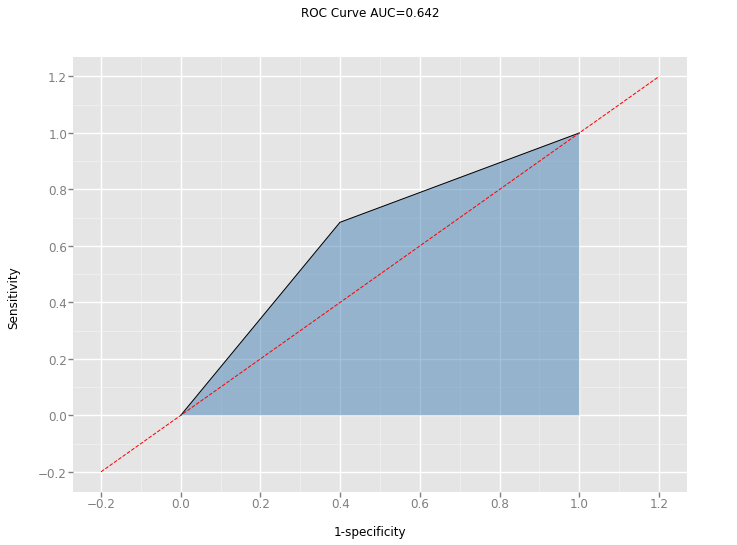

<ggplot: (28954025)>

In [20]:
# 绘制ROC曲线
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
df1 = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

ggplot(df1, aes(x='fpr', y='tpr')) +\
    geom_area(alpha=0.5, fill = 'steelblue') +\
    geom_line() +\
    geom_abline(linetype='dashed',color = 'red') +\
    labs(x = '1-specificity', y = 'Sensitivity',title = 'ROC Curve AUC=%.3f' % metrics.auc(fpr,tpr))

#模型调参

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()#调用Logistic算法

clf.fit(X_train,y_train)#使用Logistic算法,默认参数训练测试数据

clf.score(X_test,y_test)#在测试机上进行预测，可以得到预测测试数据结果和测试数据结果的分数（默认分数是通过准确率进行评估）


0.73721157190893982

In [22]:
from sklearn.grid_search import GridSearchCV#导入相应得包进行参数指定

param = {"C":[0.01,0.05,0.1],"max_iter":[100,200,300]} #通过字典的形式，导入参数都有哪些测试值

gsc = GridSearchCV(clf,param,scoring="accuracy",cv=2,verbose=1)#设置算法，模型参数，计算折数，是否显示

gsc.fit(X_train,y_train)#使用设定好的算法及模型参数训练模型

gsc.grid_scores_#查看每种参数的分数是多少

gsc.best_params_#选择分数最高的参数组合

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   16.7s finished


{'C': 0.1, 'max_iter': 100}

In [23]:
from sklearn.metrics import precision_recall_curve#导入相关包计算precision和recall

prob=gsc.predict_proba(X_test)#计算出测试数据出现的概率

precision,recall,thre=precision_recall_curve(y_test,prob[:,1])#会得到不同阈值所对应的precision和recall

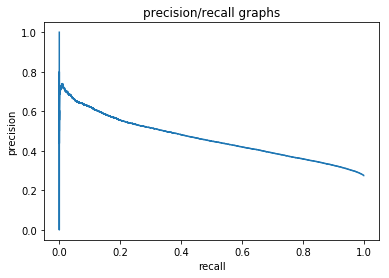

In [24]:
#画出precision（纵轴）和recall（横轴）图
plt.plot(recall,precision)
plt.title("precision/recall graphs")
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()


In [25]:
from sklearn.metrics import classification_report#查看模型计算结果

print(classification_report(y_test,gsc.predict(X_test)))#查看阈值在0.5时的precision和recall值，f1值是对于precision和recall值的综合考量

             precision    recall  f1-score   support

          0       0.75      0.96      0.84    150108
          1       0.58      0.16      0.25     56876

avg / total       0.70      0.74      0.68    206984



## 随机森林

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, oob_score=True,n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [17]:
from sklearn import metrics
def measure_performance(X,y,clf, show_accuracy=True, 
                        show_classification_report=True, 
                        show_confusion_matrix=True):
    y_pred=clf.predict(X)   
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y,y_pred)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")

    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")


In [18]:
measure_performance(X_test,y_test,model, show_classification_report=True, show_confusion_matrix=True)


Accuracy:0.905 

Classification report
             precision    recall  f1-score   support

          0       0.89      0.99      0.94    150108
          1       0.95      0.69      0.80     56876

avg / total       0.91      0.90      0.90    206984
 

Confusion matrix
[[148066   2042]
 [ 17636  39240]] 



In [27]:
model.oob_score_

0.89974759866738718

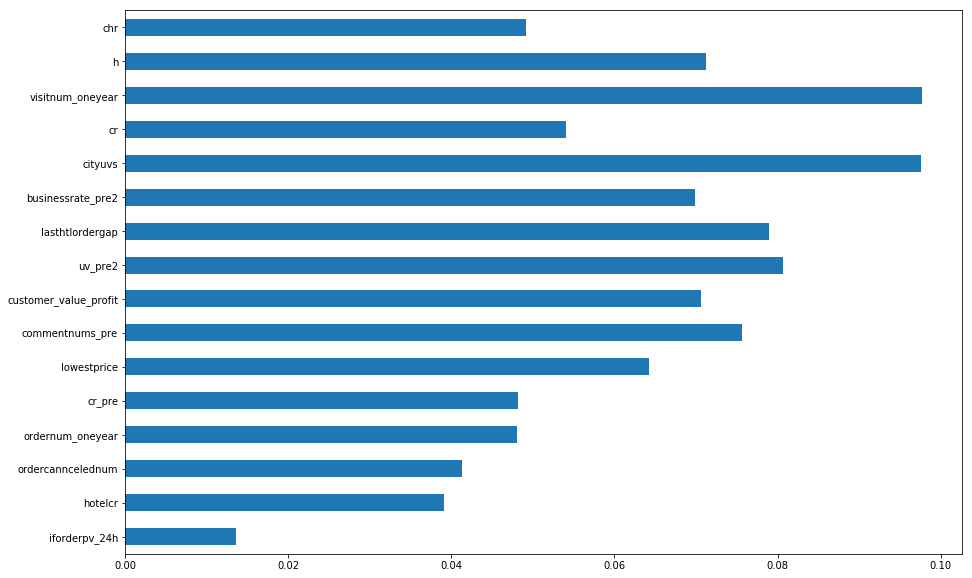

In [29]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending = False)
feature_importances.plot(kind="barh", figsize=(15,10))


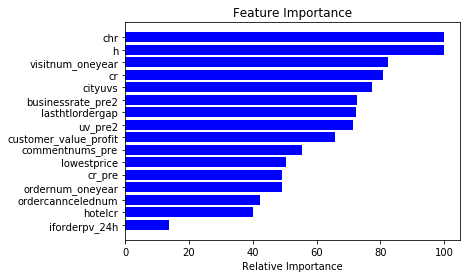

In [20]:
import matplotlib.pyplot as plt
feature_importance = model.feature_importances_
important_features = X.columns.values[0::]
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5

plt.title('Feature Importance')
plt.barh(pos, feature_importance[sorted_idx[::-1]], color='blue',align='center')
plt.yticks(pos, important_features)
plt.xlabel('Relative Importance')
plt.draw()
plt.show()


In [52]:
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

30 trees
C-stat:  0.932545510566

50 trees
C-stat:  0.943423348664

100 trees
C-stat:  0.951392447005

200 trees
C-stat:  0.955393935118

500 trees
C-stat:  0.957918505344

800 trees
C-stat:  0.958502568286

1000 trees
C-stat:  0.958737466393



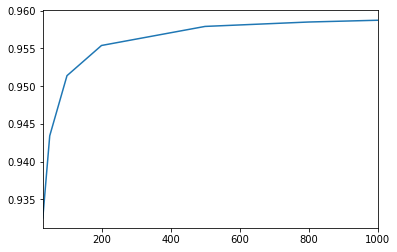

In [57]:
results = []
n_estimator_options = [30,50,100,200,500,800,1000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    print(trees, "trees")
    roc = metrics.roc_auc_score(y_train, model.oob_prediction_)
    print("C-stat: ", roc)
    results.append(roc)
    print ("")
    
pd.Series(results, n_estimator_options).plot()


## 决策树模型

In [30]:
from sklearn import tree

In [31]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [32]:
clf.score(X_test,y_test)

0.85131701001043558

In [33]:
y_pred = clf.predict(X_test)

In [34]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.89      0.90    150108
          1       0.72      0.74      0.73     56876

avg / total       0.85      0.85      0.85    206984

